# Stock Market Prediction And Forecasting Using Stacked LSTM

Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data=pd.read_csv(r"E:\Let's grow more\NSE-TATAGLOBAL.csv")  #Load data set

In [3]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
data.shape

(2035, 8)

# Divide dataset into training and testing dataset

In [5]:
training_set = data.iloc[:1525, 1:2].values
test_set = data.iloc[1525:, 1:2].values

In [6]:
training_set.shape

(1525, 1)

Feature scaling

In [7]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 time-steps and 1 output

In [8]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

Apply LSTM Model for stock market prediction task

In [9]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0402
Epoch 2/100
740/740 [==============================] - 3s 5ms/step - loss: 0.0075
Epoch 3/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0056
Epoch 4/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0054
Epoch 5/100
740/740 [==============================] - 4s 6ms/step - loss: 0.0048
Epoch 6/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0053
Epoch 7/100
740/740 [==============================] - 4s 6ms/step - loss: 0.0121A: 0s - loss: 0
Epoch 8/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0056
Epoch 9/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0041
Epoch 10/100
740/740 [==============================] - 4s 6ms/step - loss: 0.0046
Epoch 11/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0048
Epoch 12/100
740/740 [==============================] - 4s 6ms/step - loss: 0.004

In [10]:
dataset_train = data.iloc[:1525, 1:2]
dataset_test = data.iloc[1525:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


# Prediction

In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [12]:
predicted_stock_price

array([[130.37585 ],
       [128.95287 ],
       [127.24325 ],
       [125.59166 ],
       [124.49614 ],
       [123.65543 ],
       [122.9875  ],
       [122.78972 ],
       [122.98991 ],
       [123.18244 ],
       [122.97562 ],
       [122.283134],
       [121.13589 ],
       [119.73104 ],
       [118.56839 ],
       [117.679016],
       [117.31665 ],
       [117.777916],
       [119.061584],
       [120.92121 ],
       [122.82578 ],
       [124.21153 ],
       [124.80878 ],
       [124.7192  ],
       [124.15191 ],
       [122.91533 ],
       [120.98949 ],
       [118.59073 ],
       [116.08072 ],
       [113.78446 ],
       [111.97052 ],
       [111.0157  ],
       [110.95703 ],
       [111.64542 ],
       [112.92525 ],
       [114.49793 ],
       [116.23012 ],
       [117.56672 ],
       [118.19097 ],
       [117.92735 ],
       [116.86154 ],
       [115.26254 ],
       [113.75764 ],
       [112.770546],
       [112.58238 ],
       [113.28384 ],
       [114.35505 ],
       [115.4

In [13]:
y_train

array([0.74766355, 0.71072541, 0.71206053, 0.72140632, 0.72007121,
       0.69915443, 0.6893636 , 0.69003115, 0.71517579, 0.76390743,
       0.75011126, 0.78393413, 0.7423231 , 0.72986204, 0.71094793,
       0.72363151, 0.71517579, 0.729417  , 0.71094793, 0.67868269,
       0.72096128, 0.74187806, 0.72986204, 0.67200712, 0.68713841,
       0.67512239, 0.66399644, 0.65865599, 0.63862928, 0.62750334,
       0.62794838, 0.64663996, 0.62527815, 0.60970182, 0.68291055,
       0.78771696, 0.80729862, 0.84534935, 0.83044059, 0.85892301,
       0.82688028, 0.81909212, 0.84445928, 0.86515354, 0.84957721,
       0.84757454, 0.84334668, 0.80129061, 0.80106809, 0.82198487,
       0.81419671, 0.81441923, 0.79795283, 0.79661771, 0.76101469,
       0.76101469, 0.76056965, 0.77036048, 0.78860703, 0.76546506,
       0.76457499, 0.76346239, 0.77303071, 0.76991544, 0.69581664,
       0.70427236, 0.7165109 , 0.69003115, 0.6588785 , 0.71940365,
       0.7222964 , 0.69737428, 0.75478416, 0.79127726, 0.77881

In [14]:
dataset_test

,Open
1525,121.0
1526,120.0
1527,120.0
1528,123.0
1529,115.0
...,...
2030,117.6
2031,120.1
2032,121.8
2033,120.3


In [15]:
predicted_stock_price=predicted_stock_price.reshape(-1,1)

In [16]:
X_test.shape


(459, 60, 1)

In [17]:
predicted_stock_price.shape

(459, 1)

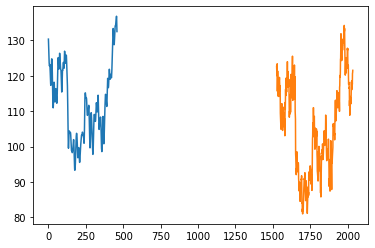

In [18]:
plt.plot(predicted_stock_price)
actual=data.loc[1525:,'Close']

plt.plot(actual)

In [19]:
actual.shape

(510,)

In [20]:
actual=np.array(actual)

In [21]:
actual

array([122.65, 120.65, 120.05, 120.8 , 123.4 , 115.65, 118.75, 121.35,
       119.05, 116.35, 114.45, 114.2 , 115.4 , 116.45, 115.7 , 114.15,
       117.8 , 119.45, 118.8 , 119.55, 117.95, 115.95, 115.75, 117.15,
       115.15, 109.45, 108.2 , 107.7 , 106.25, 104.9 , 105.65, 107.65,
       105.85, 108.5 , 112.05, 110.85, 112.05, 109.15, 107.9 , 105.35,
       104.55, 105.65, 107.6 , 107.55, 110.  , 111.1 , 107.95, 109.6 ,
       107.9 , 107.  , 106.8 , 105.55, 107.35, 107.85, 104.85, 103.05,
       108.45, 112.45, 110.5 , 112.85, 116.2 , 114.4 , 117.45, 119.35,
       116.9 , 116.4 , 115.7 , 115.45, 116.65, 118.5 , 117.4 , 121.7 ,
       124.  , 119.15, 118.95, 118.5 , 116.8 , 121.2 , 118.25, 117.4 ,
       116.95, 117.7 , 118.95, 115.35, 112.35, 108.3 , 109.85, 110.05,
       109.15, 112.7 , 110.95, 114.7 , 113.1 , 109.7 , 112.95, 116.  ,
       120.4 , 118.1 , 116.8 , 118.2 , 116.1 , 113.8 , 116.  , 120.4 ,
       120.55, 123.35, 125.55, 120.7 , 113.05, 119.95, 120.  , 117.2 ,
      

# Print grapgh for predicted and actual values 

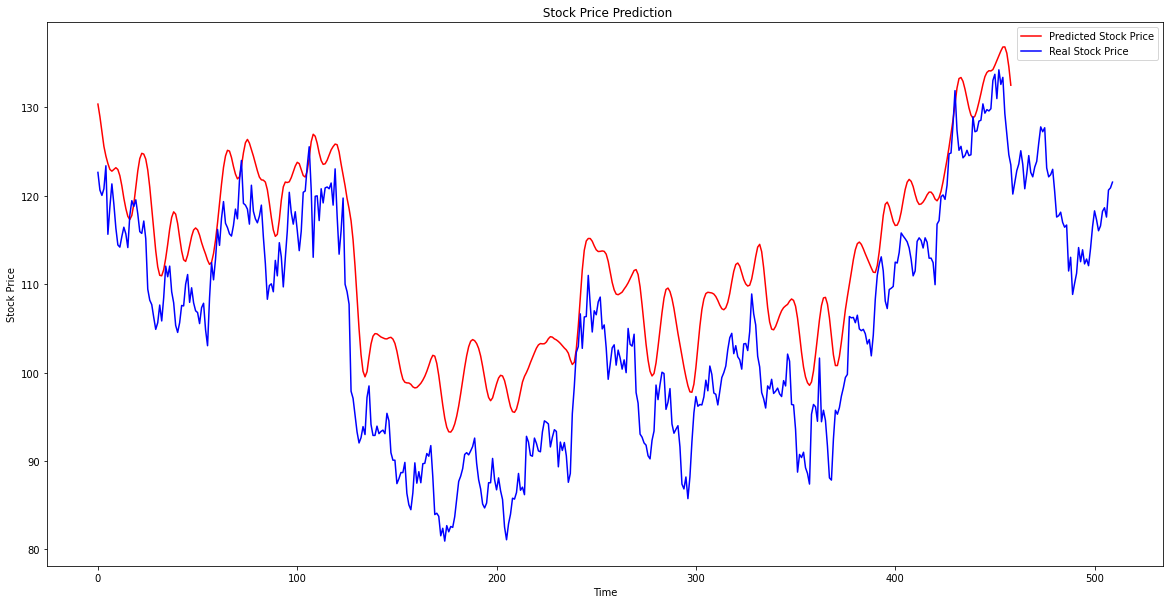

In [22]:
plt_1 = plt.figure(figsize=(20,10))
plt.plot(predicted_stock_price,color = 'red',label = 'Predicted Stock Price')
#actual=data.loc[1525:,'Close']

plt.plot(actual,color='blue',label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
